In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Gradient Descent

## Implementing Gradient Descent in 3 steps: 

1. Start with theta parameter (slope) = 0
2. Calculate the derivatie the parameter
3. Update the parameter in the direction that decreases cost
4. Repeat until function converges on the best solution

Gradient Descent is applied to the MSE of a linear regression to predict red wine quality, using this dataset: https://archive.ics.uci.edu/ml/datasets/wine

### Optimizing the MSE cost function with 1 parameter

In [ ]:
# define cost function to be optimized (mean squared error)

def MSE(x, y, theta): # theta = slope of the regression line
    m = y.shape[0] # gets length of vector
    return (1/ (2*m)) * np.sum((theta * x - y) ** 2) # returns the mean squared error of this theta

# define derivative of cost function
def MSE_derivative(x, y, theta): 
    m = y.shape[0] # gets length of vector
    return (1 / m) * np.sum((theta * x - y) * x) # returns the tangent of the cost function



In [12]:
data = pd.read_csv("winequality-red.csv", sep=";") # get dataset containing red wine quality
data.iloc[:5, :5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides
0,7.4,0.70,0.00,1.9,0.076
1,7.8,0.88,0.00,2.6,0.098
2,7.8,0.76,0.04,2.3,0.092
3,11.2,0.28,0.56,1.9,0.075
4,7.4,0.70,0.00,1.9,0.076


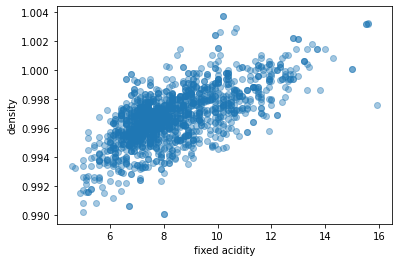

In [18]:
# goal is to model the relationship between fixed axidity and density
plt.xlabel("fixed acidity")
plt.ylabel("density")

# scatter plot revealse a linear relationship with some outliers
plt.scatter(data['fixed acidity'], data['density'], alpha=0.4)

In [23]:
# reshape column with X values as a single vector to be usable for scikit method
X = data['fixed acidity'].to_numpy().reshape(-1, 1)
X.shape

(1599, 1)

In [24]:
# do the same for Y values
y = data['density'].to_numpy().reshape(-1, 1)
y.shape

(1599, 1)

In [25]:
# scale values to be in the same unit using standard scaler

from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler() # scale data to mean = 0 and stddev = 1
X = standard_scaler.fit_transform(X)
y = standard_scaler.fit_transform(y)

In [26]:
# use our function to get derivative of the mean square error with theta = 0

MSE_derivative(x=X, y=y, theta=0) 

-0.6680472921189736

Result of -0.66 shows we must increase theta value in order to improve the cost function. Since the MSE derivative is large at theta = 0, it means that the slope of the cost function curve is steep. When the cost function curve is steep it makes sense to subtract / add to the theta value by a large number.

This is why to arrive at a better theta value, we find a new theta value by subtracting the MSE derivative from the theta value. In addition we use the product of the MSE derivative with a defined learning rate as a scalar that determines how many steps the Gradient Descent should take at each iteration.

In [27]:
# an example of subtracting the product of the learning rate and the MSE_derivative

lr = 0.01 # learning rate
theta = 0 # theta coefficient
theta = theta - lr * MSE_derivative(x=X, y=y, theta=theta)
theta # we have updated our theta value from 0 to approximately 0.007

0.006680472921189736

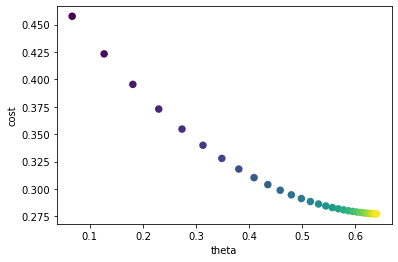

In [30]:
# implementing gradient descent to iteratively update parameters and store cost and parameter value 
# to plot cost as a function of parameters

lr = 0.1
theta = 0

theta_all = []
cost_all = []

for i in range(30):
    theta = theta - lr * MSE_derivative(x=X, y=y, theta=theta)
    cost = MSE(X, y, theta)
    
    theta_all.append(theta)
    cost_all.append(cost)
    
plt.xlabel("theta")
plt.ylabel("cost")
    
plt.scatter(theta_all, cost_all, linewidth=1.5, 
            c=np.arange(len(cost_all)))

Cost (MSE value) quickly converges at approximately 0.275 with a learning rate of 0.1 for the theta value

In [31]:
best_slope = theta_all[-1] # get the best slope (theta value)
best_slope 

0.6397279936234286

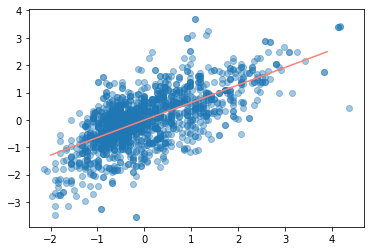

In [32]:
# plotting the best slope on a scatter of wine fixed acidity and density
x_axis = np.arange(-2, 4, 0.1)
y_axis = best_slope * x_axis
plt.scatter(X, y, alpha=0.4, zorder=0)
plt.plot(x_axis, y_axis, c='#FF8177')

### Optimizing the MSE cost function with 2 parameters

In [62]:
# define cost function to be optimized (mean squared error)

def MSE_x2(x, y, theta0, theta1): # theta
    m = y.shape[0] # gets length of vector
    return (1/ (2*m)) * np.sum((theta0 + theta1 * x - y) ** 2) # returns the mean squared error of this theta

# define derivative of cost function
def MSE_derivative_x2(x, y, theta0, theta1): 
    m = y.shape[0] # gets length of vector
    return (1 / m) * np.sum((theta0 + theta1 * x - y) * x) # returns the tangent of the cost function


Only difference between MSE and its derivative when p variables = 2, is that the second theta is added to the product of the given parameter's theta and x value.

Let's try with a second X value.

In [63]:
data = pd.read_csv("winequality-red.csv", sep=";") # get dataset containing red wine quality
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


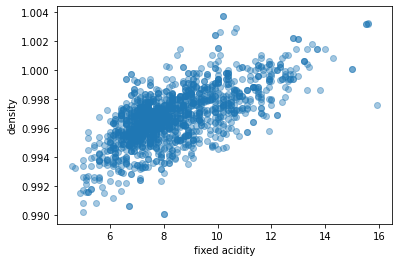

In [64]:
# density is still used as y variable and we keep fixed acidity
plt.xlabel("fixed acidity")
plt.ylabel("density")

# scatter plot reveals a linear relationship with some outliers
plt.scatter(data['fixed acidity'], data['density'], alpha=0.4)

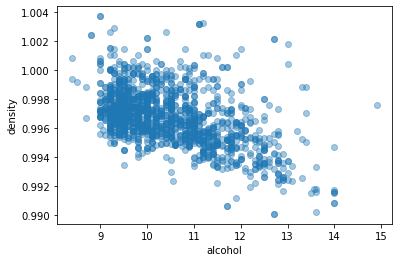

In [65]:
# now lets include alcohol
plt.xlabel("alcohol")
plt.ylabel("density")

# the relationship is linear but seems negatively correlated
plt.scatter(data['alcohol'], data['density'], alpha=0.4)

In [66]:
# lets get a two dimensional matrix of X values
X = data[['fixed acidity', 'alcohol']].to_numpy()
X.shape

(1599, 2)

In [67]:
# get reshaped vector for y
y = data['density'].to_numpy().reshape(-1, 1)
y.shape

(1599, 1)

In [71]:
X = standard_scaler.fit_transform(X)
y = standard_scaler.fit_transform(y)

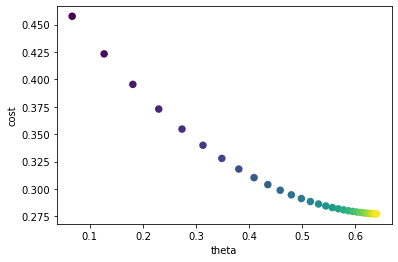

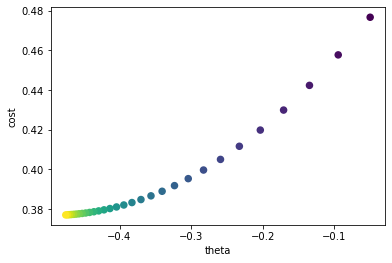

In [73]:
# implementing gradient descent to iteratively update parameters and store cost and parameter value 
# to plot cost as a function of parameters

lr = 0.1

theta_all = []
cost_all = []

# transpose the matrix to iterate through its vectors rather than rows
for vector in X.T:
    
    theta = 0
    
    x_n = vector.reshape(-1, 1) # reshape values back to vector
    
    theta_list = []
    cost_list = []

    for i in range(30):
        theta = theta - lr * MSE_derivative_x2(x_n, y, 0, theta) # theta
        cost = MSE_x2(x_n, y, 0, theta)

        theta_list.append(theta)
        cost_list.append(cost)
    
    plt.xlabel("theta")
    plt.ylabel("cost")
    
    plt.scatter(theta_list, cost_list, linewidth=1.5, 
                c=np.arange(len(cost_list)))
    plt.show()
    
    theta_all.append(theta)
    cost_all.append(cost)
    